In [1]:
import numpy as np

class Line:
    def __init__(self, x=0, y=0, z=0, dx=0, dy=0, dz=0, point=[], direction=[], params=[], det_id=0):
        if len(params) == 6:
            self.x,  self.y,  self.z  = params[:3] 
            self.dx, self.dy, self.dz = params[3:]
        elif len(point) == 3 and len(direction) == 3:
            self.x,  self.y,  self.z  = point
            self.dx, self.dy, self.dz = direction
        else:
            self.x,  self.y,  self.z  =  x,  y,  z
            self.dx, self.dy, self.dz = dx, dy, dz
        
        # just to make this line a detector Line
        self.det_id = det_id

    def __repr__(self):
        return "Line: p = ({:.3f}, {:.3f}, {:.3f}), v = [{:.3f}, {:.3f}, {:.3f}]".format(
            self.x, self.y, self.z, self.dx, self.dy, self.dz
        )
            
    def distance(self, other):
        n_vector = np.cross(self.line_vector(), other.line_vector())
        s_o_vector = np.array([self.x - other.x, self.y - other.y, self.z - other.z])
        return np.linalg.norm( np.dot(n_vector, s_o_vector) ) / np.linalg.norm(n_vector)

    def line_vector(self):
        return np.array([self.dx, self.dy, self.dz])

def test_line():
    print("Testing...")
    v = np.array([2.0, -2.0, 1.0])
    w = np.array([1.0, 2.0, -1.0])
    k_point = [3.0, -1.0, 2.0] 
    k_direction = [2.0, -2.0, 1.0]
    m_params = [3.0, -1.0, 2.0, 2.0, -2.0, 1.0]

    v_l = Line(3.0, -1.0, 2.0, v[0], v[1], v[2])
    w_l = Line(0.0, 0.0, 4.0, w[0], w[1], w[2])
    k_l = Line(point=k_point, direction = k_direction)
    m_l = Line(params=m_params)

    print("Desired result:                                      \t{}".format(np.sqrt(5.0)))
    print("Distance from line created with x,y,z,dx,dy,dz:      \t{}".format(v_l.distance(w_l)))
    print("Distance from line created with point and direction: \t{}".format(k_l.distance(w_l)))
    print("Distance from line created with params:              \t{}".format(m_l.distance(w_l)))
    

test_line()

Testing...
Desired result:                                      	2.2360679775
Distance from line created with x,y,z,dx,dy,dz:      	2.2360679775
Distance from line created with point and direction: 	2.2360679775
Distance from line created with params:              	2.2360679775


**My minimization**

In [2]:
# My dataset :)

detectors = {
    1040: {'x': -2.387, 'y': 20.098, 'z': 212979.7, 'dx': -0.798, 'dy': 0.602},
    1041: {'x': -3.403, 'y': 19.997, 'z': 212984.3, 'dx': 0.602, 'dy': 0.798},
    1042: {'x': -2.418, 'y': 20.122, 'z': 212988.7, 'dx': -0.798, 'dy': 0.603},
    1043: {'x': -3.410, 'y': 19.988, 'z': 212993.3, 'dx': 0.602, 'dy': 0.798},
    1044: {'x': -2.405, 'y': 20.112, 'z': 212997.7, 'dx': -0.798, 'dy': 0.603},
    1045: {'x': -3.425, 'y': 19.968, 'z': 213002.3, 'dx': 0.602, 'dy': 0.798},
    1046: {'x': -2.402, 'y': 20.110, 'z': 213006.7, 'dx': -0.799, 'dy': 0.602},
    1047: {'x': -3.428, 'y': 19.965, 'z': 213011.3, 'dx': 0.602, 'dy': 0.799},
    1048: {'x': -2.418, 'y': 20.122, 'z': 213015.7, 'dx': -0.799, 'dy': 0.601},
    1049: {'x': -3.453, 'y': 19.931, 'z': 213020.3, 'dx': 0.602, 'dy': 0.798},
    1200: {'x': 1.043, 'y': 22.143, 'z': 214607.7, 'dx': -0.720, 'dy': 0.693},
    1201: {'x': 0.186, 'y': 22.086, 'z': 214612.3, 'dx': 0.693, 'dy': 0.721},
    1202: {'x': 1.110, 'y': 22.079, 'z': 214616.7, 'dx': -0.721, 'dy': 0.693},
    1203: {'x': 0.160, 'y': 22.058, 'z': 214621.3, 'dx': 0.693, 'dy': 0.721},
    1204: {'x': 1.156, 'y': 22.035, 'z': 214625.7, 'dx': -0.721, 'dy': 0.693},
    1205: {'x': 0.137, 'y': 22.035, 'z': 214630.3, 'dx': 0.693, 'dy': 0.721},
    1206: {'x': 1.223, 'y': 21.970, 'z': 214634.7, 'dx': -0.721, 'dy': 0.693},
    1207: {'x': 0.089, 'y': 21.984, 'z': 214639.3, 'dx': 0.694, 'dy': 0.720},
    1208: {'x': 1.263, 'y': 21.932, 'z': 214643.7, 'dx': -0.721, 'dy': 0.693},
    1209: {'x': 0.093, 'y': 21.988, 'z': 214648.3, 'dx': 0.693, 'dy': 0.721},
    1240: {'x': -0.076, 'y': 21.043, 'z': 219979.7, 'dx': -0.706, 'dy': 0.708},
    1241: {'x': -1.063, 'y': 21.017, 'z': 219984.3, 'dx': 0.708, 'dy': 0.706},
    1242: {'x': -0.058, 'y': 21.025, 'z': 219988.7, 'dx': -0.706, 'dy': 0.709},
    1243: {'x': -1.056, 'y': 21.024, 'z': 219993.3, 'dx': 0.708, 'dy': 0.706},
    1244: {'x': -0.048, 'y': 21.016, 'z': 219997.7, 'dx': -0.707, 'dy': 0.707},
    1245: {'x': -1.054, 'y': 21.027, 'z': 220002.3, 'dx': 0.707, 'dy': 0.707},
    1246: {'x': -0.020, 'y': 20.988, 'z': 220006.7, 'dx': -0.707, 'dy': 0.707},
    1247: {'x': -1.092, 'y': 20.988, 'z': 220011.3, 'dx': 0.708, 'dy': 0.707},
    1248: {'x': -0.010, 'y': 20.978, 'z': 220015.7, 'dx': -0.707, 'dy': 0.707},
    1249: {'x': -1.086, 'y': 20.994, 'z': 220020.3, 'dx': 0.707, 'dy': 0.707}
}

# Distance from detector center to strip which was hit
positions = {1041: -3.7475, 1043: -3.7475, 1045: -3.7475, 1047: -3.7475, 1049: -3.6815,
             1040: -6.3215, 1042: -6.3875, 1044: -6.3215, 1046: -6.3215, 1048: -6.3215,
             1201: -6.5855, 1203: -6.5195, 1205: -6.5195, 1207: -6.3875, 1209: -6.4535,
             1200: -5.4635, 1202: -5.3975, 1204: -5.3315, 1206: -5.1995, 1208: -5.1335,
             1241: -3.8135, 1243: -3.8135, 1245: -3.8135, 1247: -3.7475, 1249: -3.7475,
             1240: -4.6715, 1242: -4.6055, 1244: -4.6055, 1246: -4.5395, 1248: -4.5395}    



In [3]:
# DATASET ACCESS METHODS
def get_line_set(kind='event'):
    if kind == 'event':
        return get_event_set()
    else:
        return get_test_set()

'''
Testowe linie:

                          
         ^  a  b           On plane z = 0:           On plane z = 5
_________|__|__|______ c   a = (1, 0, 0) (0, 1, 0)   a' = (1, 0, 5) (0, 1, 0)
_________|__|__|______ d   b = (2, 0, 0) (0, 1, 0)   b' = (2, 0, 5) (0, 1, 0)
         |  |  |           c = (0, 1, 0) (1, 0, 0)   c' = (0, 1, 5) (1, 0, 0)
---------+------------>    d = (0, 2, 0) (1, 0, 0)   d' = (0, 2, 5) (1, 0, 0)
         |  |  |        
         |  |  |        
'''
def get_test_set():
    a_0 = Line(point=[1, 0, 0], direction=[0, 1, 0])   
    b_0 = Line(point=[2, 0, 0], direction=[0, 1, 0])   
    c_0 = Line(point=[0, 1, 0], direction=[1, 0, 0])   
    d_0 = Line(point=[0, 2, 0], direction=[1, 0, 0])
    
    a_1 = Line(point=[1, 0, 10], direction=[0, 1, 0])
    b_1 = Line(point=[2, 0, 10], direction=[0, 1, 0])
    c_1 = Line(point=[0, 1, 10], direction=[1, 0, 0])
    d_1 = Line(point=[0, 2, 10], direction=[1, 0, 0])
    
    return [a_0, b_0, c_0, d_0, a_1, b_1, c_1, d_1]

DET_Z_TRANSLATION = -210000

def get_event_set():
    line_set = []
    for det_id in detectors:
        x  =  detectors[det_id]['x'] + positions[det_id] * detectors[det_id]['dx']
        y  =  detectors[det_id]['y'] + positions[det_id] * detectors[det_id]['dy']
        z  =  detectors[det_id]['z'] + DET_Z_TRANSLATION
        dx =  detectors[det_id]['dy']
        dy = -detectors[det_id]['dx']
        dz = 0.0
        line_set.append(Line(x, y, z, dx, dy, dz, det_id=det_id))
    return line_set


In [4]:
# SETTING GLOBAL LINE SET
LINE_SET = get_line_set(kind='event')

In [11]:
# PRINTING OUTPUT FROM MINIMIZATION FUNCTION

class Hit:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z


def print_output(solution):
    print("{}\n".format(solution))
    print("Solution: [\n\tx = {}\n\ty = {} \n\tz = {} \n\tdx = {} \n\tdy = {} \n\tdz = {} ]".format(
        solution.x[0],
        solution.x[1],
        solution.x[2] - DET_Z_TRANSLATION,
        solution.x[3],
        solution.x[4],
        solution.x[5])
    )
    print("]")
    print("Distances from detector lines and hit position")
    print("ID\tDistance from hit line [mm]\t x [mm]\t\ty [mm]\t\tz [mm]")

    plane_hit = Hit()

    for line in LINE_SET:
        sol_x, sol_y, sol_z = solution.x[0], solution.x[1], solution.x[2]
        sol_dx, sol_dy, sol_dz = solution.x[3], solution.x[4], solution.x[5]
        det_z = detectors[line.det_id]['z']
        k = (det_z - (sol_z - DET_Z_TRANSLATION)) / sol_dz

        plane_hit.x = sol_x + k * sol_dx
        plane_hit.y = sol_y + k * sol_dy
        plane_hit.z = det_z

        print("{}\t{:.5f}\t\t\t\t({:.5f}\t{:.5f}\t{})".format(line.det_id,
                                                              Line(params=solution.x).distance(line),
                                                              plane_hit.x,
                                                              plane_hit.y,
                                                              plane_hit.z))
    print("\n")

In [12]:
# MINIMIZATION
from scipy.optimize import minimize

# OBJECTIVE FUNCTION
def objective(params):
    line = Line(params=params)                                  # CREATING FITTED LINE FROM PARAMS
    return np.sum([line.distance(other) for other in LINE_SET]) # SUM OF DISTANCES
    
# CONSTRAINTS
def constraint1(params):
    return 1.0 - np.sum([dir**2 for dir in params[3:]]) # dx^2 + dy^2 + dz^2 = 1

con1 = {'type': 'eq', 'fun':constraint1}
cons = [con1]

# BOUND FOR PARAMETERS
b_xy = (-50.0, 50.0)
b_z = (0.0, 1000.0)
b_dir = (-1.0, 1.0)
bnds = (b_xy, b_xy, b_z, b_dir, b_dir, b_dir)

# MINIMIZATION METHODS FOR TESTING
'''
METHODS WHERE HESSIAN NEEDED:  ['Newton-CG', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov']
METHODS WHERE CONSTRAINTS DO NOT WORK: ['CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA']
CONSTRAINTS PROBLEMS: ['Nelder-Mead', 'Powell'] 
'''

methods = ['SLSQP']
x0 = [0.5, 0.5, 0.5, 1, 1, 1]

for method in methods:
    print("Method: {}".format(method))
    solution = minimize(objective, x0, method=method, constraints=cons)
    print_output(solution)

Method: SLSQP
     fun: 0.43446445144090573
     jac: array([ -1.38786770e-02,   1.21833957e+00,  -3.19652259e-04,
         9.88886628e+03,   1.41207787e+04,  -1.57384496e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 387
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([ -5.83950135e-02,   1.19675981e+01,   7.44674355e+01,
         6.64215552e-06,   2.62454729e-04,   9.99999966e-01])

Solution: [
	x = -0.0583950135497
	y = 11.967598124 
	z = 210074.467436 
	dx = 6.64215551598e-06 
	dy = 0.000262454729279 
	dz = 0.999999965537 ]
]
Distances from detector lines and hit position
ID	Distance from hit line [mm]	 x [mm]		y [mm]		z [mm]
1040	0.00739				(-0.03910	12.73009	212979.7)
1041	0.02842				(-0.03907	12.73130	212984.3)
1042	0.03582				(-0.03904	12.73245	212988.7)
1043	0.01510				(-0.03901	12.73366	212993.3)
1044	0.01241				(-0.03898	12.73481	212997.7)
1045	0.01182				(-0.03895	12.73602	213002.3)
1046	0.00005				(-0.03892	1

**Co jest jeszcze wazne????**
    
    Zeby wlaczyc chi2 (sam sobie implementujesz) 
    Zeby zwracac popt i pcov... 
    Zakodzic to jako modul w cmssw --> powinienem tez 
        umiec wsadzac dane do eventow, 
        czytac geometrie z kodu, 
        posÅ‚ugiwac sie macierzami (tu najlepiej bedzie)

**Minimization Tutorial Example**

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1 * x4 *(x1 + x2 + x3) + x3

def constraint1(x):
    return x[0] * x[1] * x[2] * x[3] - 25.0

def constraint2(x):
    return 40 - np.sum([e**2 for e in x])

con1 = {'type': 'ineq', 'fun':constraint1}
con2 = {'type': 'eq', 'fun':constraint2}
cons = [con1, con2]

b = (1.0, 5.0) # my bound
bnds = (b,b,b,b)

x0 = [1,5,5,1]

sol = minimize(objective, x0, method='SLSQP', 
               bounds=bnds, constraints=cons)
print(sol)

**PoniÅ¼ej sÄ… gÅ‚upoty**

In [14]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


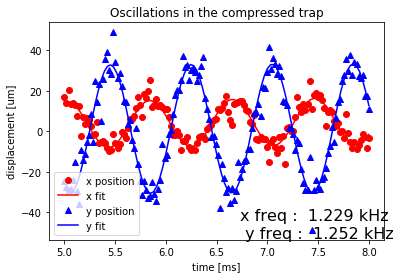

In [15]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()


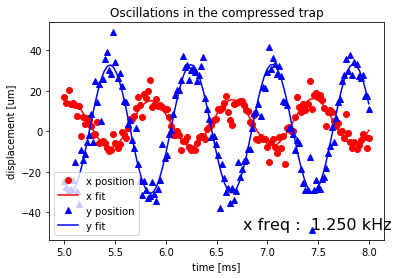

In [16]:
# Target function
fitfunc = lambda T, p, x: p[0]*np.cos(2*np.pi/T*x+p[1]) + p[2]*x
# Initial guess for the first set's parameters
p1 = r_[-15., 0., -1.]
# Initial guess for the second set's parameters
p2 = r_[-15., 0., -1.]
# Initial guess for the common period
T = 0.8
# Vector of the parameters to fit, it contains all the parameters of the problem, and the period of the oscillation is not there twice !
p = r_[T, p1, p2]
# Cost function of the fit, compare it to the previous example.
errfunc = lambda p, x1, y1, x2, y2: r_[
                fitfunc(p[0], p[1:4], x1) - y1,
                fitfunc(p[0], p[4:7], x2) - y2
            ]
# This time we need to pass the two sets of data, there are thus four "args".
p,success = optimize.leastsq(errfunc, p, args=(Tx, tX, Ty, tY))
time = np.linspace(Tx.min(), Tx.max(), 100) # Plot of the first data and the fit
plt.plot(Tx, tX, "ro", time, fitfunc(p[0], p[1:4], time),"r-")

# Plot of the second data and the fit
time = np.linspace(Ty.min(), Ty.max(),100)
plt.plot(Ty, tY, "b^", time, fitfunc(p[0], p[4:7], time),"b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz' % (1/p[0]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)
plt.show()

**Simplifying syntax**

In [ ]:
import numpy as np
from scipy import optimize

class Parameter:
    def __init__(self, value):
            self.value = value

    def set(self, value):
            self.value = value

    def __call__(self):
            return self.value

def fit(function, parameters, y, x = None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return y - function(x)

    if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

In [ ]:
# giving initial parameters
mu = Parameter(7)
sigma = Parameter(3)
height = Parameter(5)

# define your function:
def f(x): return height() * np.exp(-((x-mu())/sigma())**2)

# fit! (given that data is an array with the data to fit)
data = 10*np.exp(-np.linspace(0, 10, 100)**2) + np.random.rand(100)
print fit(f, [mu, sigma, height], data)

